In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
import gmaps

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the API key.
from config import weather_api_key

from config import g_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-62.37813785690635 -75.94017514207458
-88.10091512803052 137.69946937948623
33.82048762538679 -50.70905063120327
-60.0306068510178 -172.62057747508217
36.074792350929144 167.48638646996142
-5.930510013806426 -111.45596549701433
-71.72736981742402 71.9630845895625
44.56504740908298 -103.39864022766193
41.65518668799862 4.389405309945147
83.98366806915487 155.86110020154769
65.2199758225035 99.58828270057836
-80.41646939868512 -93.03939160821075
-80.88333241961575 -127.67096831712558
-37.396763834515504 -119.86712792916421
30.320179320774145 -158.73587568930256
-45.45831226742392 -10.913997837568672
-71.41767878585263 36.46103713523587
84.23916643100773 39.246407778807196
-75.00971452236237 43.17870659292183
-72.53687915103436 -163.54676119736737
81.6116319445739 -80.08568979900438
-10.6684322388124 118.63168487007107
-10.598340046574123 143.09295005893728
37.42886234880612 81.88521689663469
80.0451004460439 -6.464633582510146
51.4005908383719 -111.25359395373074
5.415043718400057 133.38

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

punta arenas cl
hobart au
torbay ca
vaini to
severo-kurilsk ru
puerto ayora ec
saint-philippe re
sturgis us
palafrugell es
chokurdakh ru
tura ru
punta arenas cl
rikitea pf
rikitea pf
kapaa us
jamestown sh
port alfred za
tumannyy ru
port alfred za
mataura pf
qaanaaq gl
waingapu id
daru pg
aksu cn
husavik is
hanna ca
kloulklubed pw
illoqqortoormiut gl
yellowknife ca
camargo bo
yar-sale ru
basco ph
poum nc
kapaa us
sao joao da barra br
thompson ca
albany au
kavieng pg
illoqqortoormiut gl
airai pw
arraial do cabo br
amderma ru
nong khai th
mataura pf
hobart au
baykit ru
rikitea pf
hermanus za
sisimiut gl
axim gh
jambusar in
kapaa us
port augusta au
qaanaaq gl
nampula mz
ixtapa mx
nova olimpia br
jamestown sh
okhotsk ru
dingle ie
nikolskoye ru
belushya guba ru
tilichiki ru
padang id
mataura pf
brae gb
arraial do cabo br
lebork pl
cascais pt
bilma ne
thompson ca
sisimiut gl
saskylakh ru
jahrom ir
provideniya ru
yambio sd
cabo san lucas mx
kalangala ug
namibe ao
busselton au
leningradskiy ru


belushya guba ru
illoqqortoormiut gl
chimbote pe
majene id
half moon bay us
port hardy ca
presidencia roque saenz pena ar
yellowknife ca
dikson ru
barrow us
nikolskoye ru
saint-philippe re
san patricio mx
albany au
cherskiy ru
vanimo pg
kapaa us
tasiilaq gl
la ronge ca
dikson ru
vostok ru
rikitea pf
faanui pf
caconda ao
asilah ma
pisco pe
thompson ca
asau tv
rikitea pf
taolanaro mg
castro cl
rikitea pf
attawapiskat ca
yinchuan cn
illoqqortoormiut gl
mar del plata ar
mataura pf
amapa br
port alfred za
chuy uy
vaitape pf
hilo us
punta arenas cl
linxia cn
qaanaaq gl
victoria sc
rikitea pf
bluff nz
mizan teferi et
qaanaaq gl
illoqqortoormiut gl
hirara jp
bengkulu id
itarema br
nicoya cr
superior us
hobart au
butaritari ki
ushuaia ar
haines junction ca
porangatu br
rikitea pf
bluff nz
padang id
hithadhoo mv
hualmay pe
mount gambier au
broome au
goderich sl
busselton au
rikitea pf
mirandola it
port alfred za
harper lr
itarema br
stolin by
ladario br
chokurdakh ru
hay river ca
talnakh ru
niko

vaini to
mizan teferi et
butaritari ki
ushuaia ar
hobart au
rikitea pf
cape town za
shangrao cn
san carlos de bariloche ar
lata sb
saint-philippe re
yulara au
lagoa pt
bredasdorp za
cherskiy ru
punta arenas cl
nome us
rikitea pf
hilo us
qaanaaq gl
saint-philippe re
praia cv
butaritari ki
barentsburg sj
pevek ru
sorvag fo
tuatapere nz
georgetown sh
bredasdorp za
busselton au
nikolskoye ru


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
#print (cities)

605

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)


    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print (city_url)
    #break
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #print(city_weather, "test")
        #break
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                             "Date" : city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | sturgis
Processing Record 9 of Set 1 | palafrugell
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | waingapu
Processing Record 20 of Set 1 | daru
Processing Record 21 of Set 1 | aksu
Processing Record 22 of Set 1 | husavik
Processing Record

Processing Record 38 of Set 4 | saint-augustin
Processing Record 39 of Set 4 | khatanga
Processing Record 40 of Set 4 | roma
Processing Record 41 of Set 4 | tanete
Processing Record 42 of Set 4 | jibuti
Processing Record 43 of Set 4 | san jose
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | faya
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | kuche
City not found. Skipping...
Processing Record 49 of Set 4 | moose factory
Processing Record 50 of Set 4 | mogadishu
Processing Record 1 of Set 5 | dunmore town
Processing Record 2 of Set 5 | hovd
Processing Record 3 of Set 5 | maumere
Processing Record 4 of Set 5 | makakilo city
Processing Record 5 of Set 5 | hawalli
Processing Record 6 of Set 5 | beringovskiy
Processing Record 7 of Set 5 | ust-nera
Processing Record 8 of Set 5 | betanzos
Processing Record 9 of Set 5 | palana
Processing Record 10 of Set 5 | brumadinho
Processing Record 11 of Set 5 

Processing Record 30 of Set 8 | nanortalik
Processing Record 31 of Set 8 | kerepehi
Processing Record 32 of Set 8 | mersing
Processing Record 33 of Set 8 | kahului
Processing Record 34 of Set 8 | imeni vorovskogo
Processing Record 35 of Set 8 | vestmannaeyjar
Processing Record 36 of Set 8 | tavira
Processing Record 37 of Set 8 | ambon
Processing Record 38 of Set 8 | margate
Processing Record 39 of Set 8 | santiago del estero
Processing Record 40 of Set 8 | campoverde
Processing Record 41 of Set 8 | veraval
Processing Record 42 of Set 8 | batemans bay
Processing Record 43 of Set 8 | pasvalys
Processing Record 44 of Set 8 | sherman
Processing Record 45 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 46 of Set 8 | guerrero negro
Processing Record 47 of Set 8 | sabha
Processing Record 48 of Set 8 | usolye
Processing Record 49 of Set 8 | oranjemund
Processing Record 50 of Set 8 | sosva
Processing Record 1 of Set 9 | doume
Processing Record 2 of Set 9 | manzanillo
Processi

Processing Record 16 of Set 12 | qujing
Processing Record 17 of Set 12 | hargeysa
Processing Record 18 of Set 12 | mooi river
City not found. Skipping...
Processing Record 19 of Set 12 | buraydah
Processing Record 20 of Set 12 | grand gaube
Processing Record 21 of Set 12 | kungurtug
Processing Record 22 of Set 12 | inirida
Processing Record 23 of Set 12 | armizonskoye
Processing Record 24 of Set 12 | fallon
Processing Record 25 of Set 12 | mildura
Processing Record 26 of Set 12 | hamilton
Processing Record 27 of Set 12 | okha
Processing Record 28 of Set 12 | balabac
Processing Record 29 of Set 12 | nambutalai
Processing Record 30 of Set 12 | miles city
Processing Record 31 of Set 12 | warqla
City not found. Skipping...
Processing Record 32 of Set 12 | daman
Processing Record 33 of Set 12 | makat
Processing Record 34 of Set 12 | huamachuco
Processing Record 35 of Set 12 | sao raimundo das mangabeiras
Processing Record 36 of Set 12 | bonnyville
Processing Record 37 of Set 12 | egvekinot


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,39.31,87,0,3.44,CL,2022-05-12 04:52:48
1,Hobart,-42.8794,147.3294,60.26,81,0,0.00,AU,2022-05-12 04:52:49
2,Torbay,47.6666,-52.7314,48.38,93,100,20.71,CA,2022-05-12 04:52:49
3,Vaini,-21.2000,-175.2000,75.36,69,75,9.22,TO,2022-05-12 04:52:50
4,Severo-Kurilsk,50.6789,156.1250,40.98,83,61,4.68,RU,2022-05-12 04:52:51
5,Puerto Ayora,-0.7393,-90.3518,71.55,96,9,6.51,EC,2022-05-12 04:52:51
6,Saint-Philippe,-21.3585,55.7679,76.59,79,72,6.93,RE,2022-05-12 04:52:52
7,Sturgis,41.7992,-85.4192,75.00,64,0,8.05,US,2022-05-12 04:52:53
8,Palafrugell,41.9174,3.1631,58.42,58,22,1.01,ES,2022-05-12 04:52:53
9,Chokurdakh,70.6333,147.9167,30.70,89,99,11.03,RU,2022-05-12 04:52:54


In [21]:
new_column_order = ["City", "Country", "Date" , "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-05-12 04:52:48,-53.1500,-70.9167,39.31,87,0,3.44
1,Hobart,AU,2022-05-12 04:52:49,-42.8794,147.3294,60.26,81,0,0.00
2,Torbay,CA,2022-05-12 04:52:49,47.6666,-52.7314,48.38,93,100,20.71
3,Vaini,TO,2022-05-12 04:52:50,-21.2000,-175.2000,75.36,69,75,9.22
4,Severo-Kurilsk,RU,2022-05-12 04:52:51,50.6789,156.1250,40.98,83,61,4.68
5,Puerto Ayora,EC,2022-05-12 04:52:51,-0.7393,-90.3518,71.55,96,9,6.51
6,Saint-Philippe,RE,2022-05-12 04:52:52,-21.3585,55.7679,76.59,79,72,6.93
7,Sturgis,US,2022-05-12 04:52:53,41.7992,-85.4192,75.00,64,0,8.05
8,Palafrugell,ES,2022-05-12 04:52:53,41.9174,3.1631,58.42,58,22,1.01
9,Chokurdakh,RU,2022-05-12 04:52:54,70.6333,147.9167,30.70,89,99,11.03


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

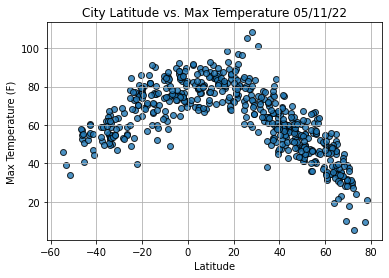

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

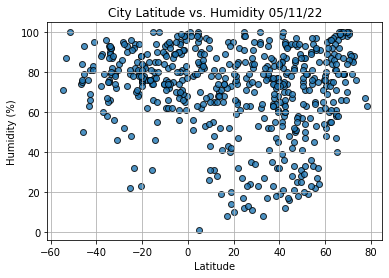

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

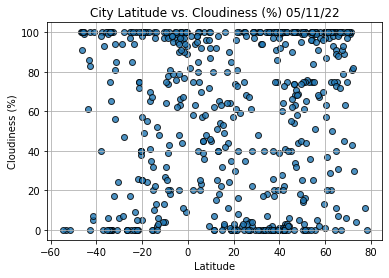

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

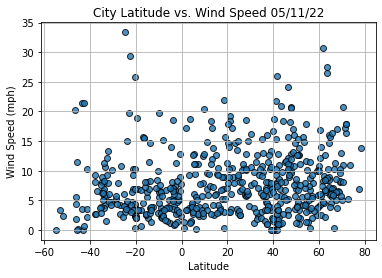

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
       # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [51]:
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2022-05-12 04:50:48
Lat                        42.097
Lng                      -79.2353
Max Temp                    55.02
Humidity                       70
Cloudiness                      0
Wind Speed                   1.01
Name: 13, dtype: object

In [52]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
553     True
554    False
555     True
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Torbay,CA,2022-05-12 04:52:49,47.6666,-52.7314,48.38,93,100,20.71
4,Severo-Kurilsk,RU,2022-05-12 04:52:51,50.6789,156.1250,40.98,83,61,4.68
7,Sturgis,US,2022-05-12 04:52:53,41.7992,-85.4192,75.00,64,0,8.05
8,Palafrugell,ES,2022-05-12 04:52:53,41.9174,3.1631,58.42,58,22,1.01
9,Chokurdakh,RU,2022-05-12 04:52:54,70.6333,147.9167,30.70,89,99,11.03


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

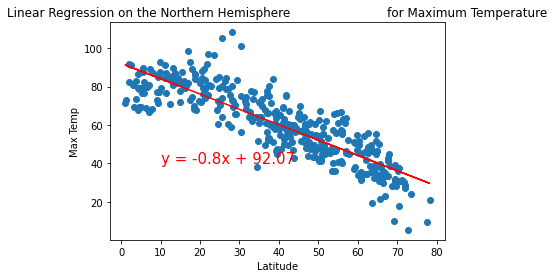

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

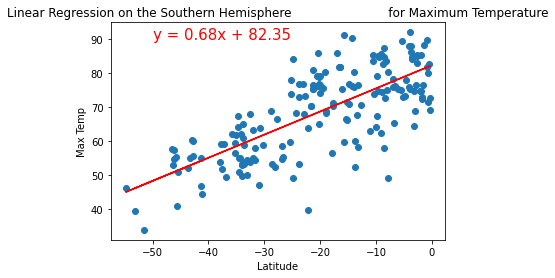

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

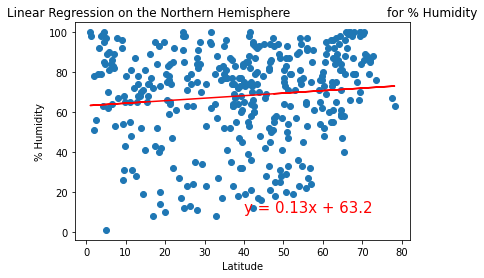

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

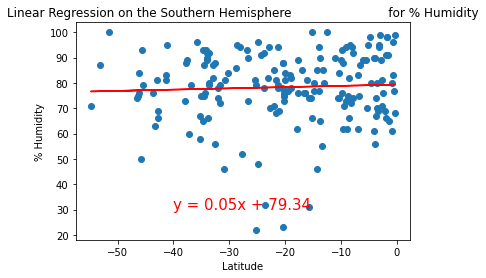

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-40,30))

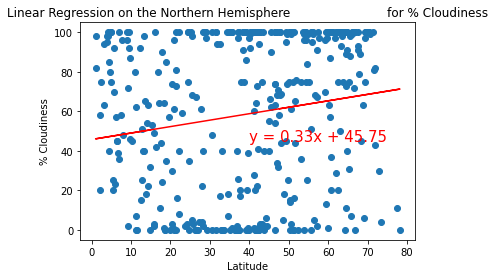

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,45))

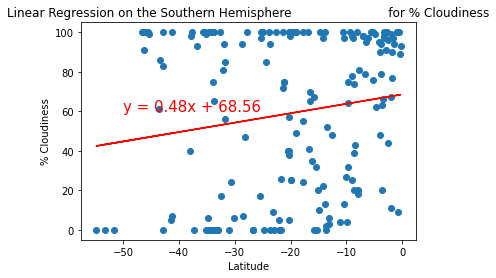

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

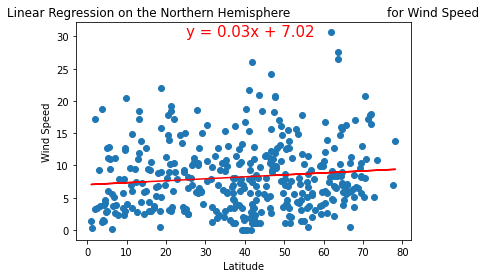

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(25,30))

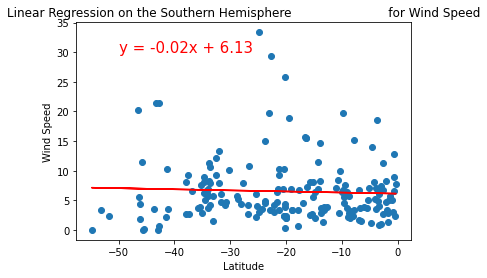

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))

In [2]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Punta Arenas,CL,2022-05-12 04:52:48,-53.1500,-70.9167,39.31,87,0,3.44
1,1,Hobart,AU,2022-05-12 04:52:49,-42.8794,147.3294,60.26,81,0,0.00
2,2,Torbay,CA,2022-05-12 04:52:49,47.6666,-52.7314,48.38,93,100,20.71
3,3,Vaini,TO,2022-05-12 04:52:50,-21.2000,-175.2000,75.36,69,75,9.22
4,4,Severo-Kurilsk,RU,2022-05-12 04:52:51,50.6789,156.1250,40.98,83,61,4.68


In [5]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [6]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))